## <u>PROJECT BASED </u>

• <b>DOMAIN:</b> Telecom
    
• <b>CONTEXT:</b> A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can
analyse all relevant customer data and develop focused customer retention programs.<br> 

• <b>DATA  DESCRIPTION:</b> Each row represents a customer, each column contains customer’s attributes described on the column
Metadata. The data set includes information about:<br><br>
. Customers who left within the last month – the column is called Churn.<br><br>
. Services that each customer has signed up for – phone, multiple lines,internet,online security,online backup,device protection,tech support,and streaming TV and movies. <br><br>
. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.<br><br>
. Demographic info about customers – gender, age range, and if they have partners and dependents.<br<br>

• <b>PROJECT OBJECTIVE:</b> Build a model that will help to identify the potential customers who have a higher probability to churn.
This help the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategising
customer retention.<br><br>
Steps to the project: <br>
<b>1. Import and warehouse data:</b><br><br>
    • Import all the given datasets. Explore shape and size.<br>
    • Merge all datasets onto one and explore final shape and size.<br><br>
<b>2. Data cleansing:</b> <br><br>
    • Missing value treatment<br>
    • Convert categorical attributes to continuous using relevant functional knowledge<br>
    • Drop attribute/s if required using relevant functional knowledge<br>
    • Automate all the above steps<br><br>
<b>3. Data analysis & visualisation:</b> <br><br>
    • Perform detailed statistical analysis on the data.<br>
    • Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.<br><br> 
<b>4. Data pre-processing:</b> <br><br>
    • Segregate predictors vs target attributes<br>
    • Check for target balancing and fix it if found imbalanced.<br>
    • Perform train-test split.<br>
    • Check if the train and test data have similar statistical characteristics when compared with original data.<br><br> 
<b>5. Model training, testing and tuning:</b> <br><br>
    • Train and test all ensemble models taught in the learning module.<br>
    • Suggestion: Use standard ensembles available. Also you can design your own ensemble technique using weak classifiers <br>
    • Display the classification accuracies for train and test data.<br>
    • Apply all the possible tuning techniques to train the best model for the given data.<br>
    • Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.<br>
    • Display and compare all the models designed with their train and test accuracies.<br>
    • Select the final best trained model along with your detailed comments for selecting this model.<br>
    • Pickle the selected model for future use.<br><br>  
<b>6. Conclusion and improvisation:</b> <br><br> 
    • Write your conclusion on the results.<br>
    • Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the telecom operator to perform a better data analysis in future.<br><br> 
    

### <u>Solution</u>

### 1.Import and warehouse data:

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
#impoting the first dataset.
df_churn1 = pd.read_csv('TelcomCustomer-Churn_1.csv')
df_churn1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [3]:
#shape and size of first dataset
print(df_churn1.shape)
df_churn1.size

(7043, 10)


70430

In [4]:
#importing second dataset
df_churn2 =pd.read_csv('TelcomCustomer-Churn_2.csv')
df_churn2.head()

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#shape and size of second dataset
print(df_churn2.shape)
df_churn2.size

(7043, 11)


77473

Both dataset have equal number of rows (7043). First dataset have 10 columns whereas second dataset have 11 columns.<br>
We have to merge both datasets onto one for further analysis.

In [6]:
#Checking whether there is any common columns between the two datasets.
df_churn1.columns.equals(df_churn2.columns)

False

In [7]:
#From above we can see there is no common columns between the datasets and both data set have equal number of rows we can merge them.
#Since there is no common column instead of using merge method we can use join method for merging.

telecom_df = df_churn1.join(df_churn2)

In [8]:
telecom_df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1950,9614-RMGHA,Male,0,Yes,No,65,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),91.85,5940.85,Yes
43,4671-VJLCL,Female,0,No,No,63,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Credit card (automatic),79.85,4861.45,No
3487,9257-AZMTZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.10,1078.75,No
2894,8869-TORSS,Female,0,No,No,48,Yes,No,DSL,Yes,...,Yes,Yes,No,No,One year,Yes,Credit card (automatic),60.35,2896.4,Yes
479,6227-HWPWX,Female,0,No,Yes,15,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),69.00,994.8,Yes


In [9]:
#After merging we can check the shape and size of final dataset.

print(telecom_df.shape)
print(telecom_df.size)

(7043, 21)
147903


We have successfully merged the dataset. Now the final dataset have 21 columns and 7043 rows.

### 2.Data cleansing:

In [10]:
telecom_df.dtypes
#Printing the datatypes of all the attributes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

From above we can see the data type of each attribute but from the sample data from the dataset we can conclude that the data type is not correctly recorded, so we need to covert them to corresponding data type.

In [11]:
#Column TotalCharges contain numerical data but its datatype is showing as object, we need to convert it to float64
#While importing the dataset pandas should have automatically converted the attribute to float but instead it got assigned as object,
#From this we could say there must be other non int values present, but it is difficult to find those particular Non-Standard values.
#So the below code will convert all numeric value to flaot and if it encounter any problem while parsing the value will be replaced with NaN.

telecom_df['TotalCharges'] = pd.to_numeric(telecom_df.TotalCharges,errors='coerce')



In [12]:
telecom_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
#The data type has been changed, now lets check for any missing values

telecom_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**TotalCharges has 11 null values. We can either replace the missing values or we could remove it. It is better to remove the missing values since out of 7043 values only 11 values are removed,so it will not affect the whole dataset.**

In [14]:
#Dropping missing values
telecom_df.dropna(axis=0,inplace=True)
telecom_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
telecom_df.shape

(7032, 21)

We have deleted 11 rows from datatset and only 7032 remains and 
no null values exist.

In [16]:
#We don't need customerID column since it doesn't give us anything to analyse, so we are dropping that column

telecom_df.drop(['customerID'],axis=1,inplace=True)
print(telecom_df.head())
copy_telecom = telecom_df.copy()

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

In [17]:
#Lets check the unique values of our categorical attributes.
#We are avoiding churn attribute since it is our target variable.

cat_col = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
          'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

for cat in cat_col:
    print(cat)
    print(telecom_df[cat].value_counts(),'\n')

gender
Male      3549
Female    3483
Name: gender, dtype: int64 

Partner
No     3639
Yes    3393
Name: Partner, dtype: int64 

Dependents
No     4933
Yes    2099
Name: Dependents, dtype: int64 

PhoneService
Yes    6352
No      680
Name: PhoneService, dtype: int64 

MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64 

OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64 

DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64 

TechSupport
No                     3472
Yes                    2040
No internet servi

We need to convert the categorical data in string format to integer format for the ML algorithm to understand. For this function we are using dummy variables.

In [18]:
#Since churn is our target variable we dont need it as dummy variable so we need to convert it to numerical form manually
telecom_df.Churn.replace(to_replace='Yes',value=1,inplace=True)
telecom_df.Churn.replace(to_replace='No',value=0,inplace=True)
telecom_df.Churn.sample(4)

4054    0
1641    0
7023    0
5856    0
Name: Churn, dtype: int64

In [19]:
df_dummies = pd.get_dummies(telecom_df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [20]:
#For further EDA we need to convert some int attributes to category in our original dataset.
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in telecom_df.columns.difference(numerical_cols):
    telecom_df[col] = telecom_df[col].astype('category')
telecom_df.dtypes    

gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

### 3.Data analysis & visualisation:

In [21]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   category
 1   SeniorCitizen     7032 non-null   category
 2   Partner           7032 non-null   category
 3   Dependents        7032 non-null   category
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   category
 6   MultipleLines     7032 non-null   category
 7   InternetService   7032 non-null   category
 8   OnlineSecurity    7032 non-null   category
 9   OnlineBackup      7032 non-null   category
 10  DeviceProtection  7032 non-null   category
 11  TechSupport       7032 non-null   category
 12  StreamingTV       7032 non-null   category
 13  StreamingMovies   7032 non-null   category
 14  Contract          7032 non-null   category
 15  PaperlessBilling  7032 non-null   category
 16  PaymentMethod     7032 n

We can see there is no null values and we can see all the data type of each attribute

In [22]:
telecom_df.describe() 
 # 5 point summary of all numerical values

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


For tenure attribute the minimum value is 1 and maximum value is 72. The mean is greater than median so there might be some noise in the distribution we can confirm through visualisation.<br><br>
MonthlyCharges the mean is less than median, here also there might be skewness.<br><br>
For TotalCharges column there might be a big amount of skewness since mean is higher than median. We can observe the minimum value is 18 and the maximum value is 8684, which might be due to higher variance in value.

**Now we can perform detailed analysis through visualisation.**

**Univariate Analysis**

**Distribution plot for all numerical variables**

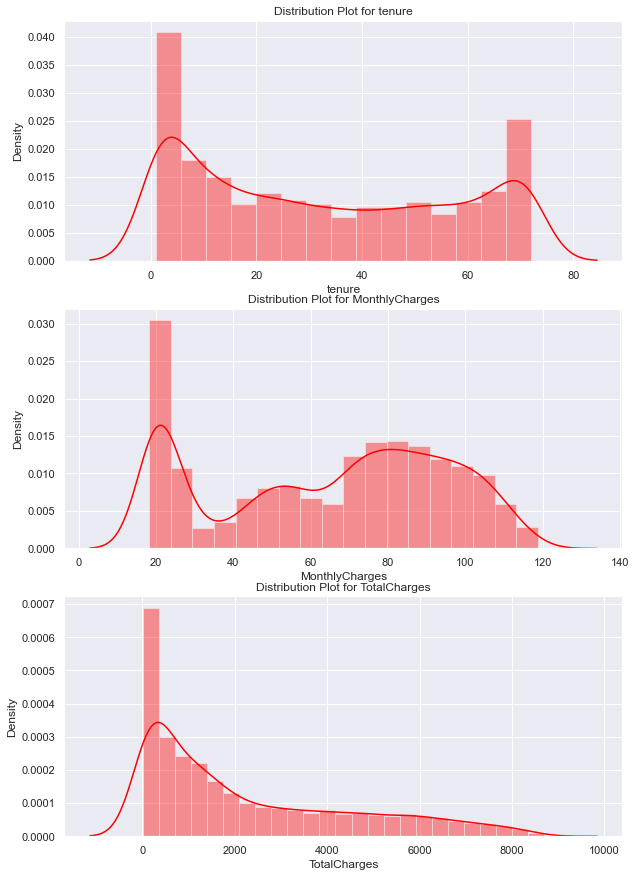

In [23]:

fig1,ax1 = plt.subplots(3)
fig1.set_figheight(15)
fig1.set_figwidth(10)
for i,col in  enumerate(numerical_cols):
    sns.distplot(telecom_df[col],color='Red',ax=ax1[i])
    ax1[i].set_title('Distribution Plot for %s'%col)


**Addition to it we can check for any outliers using boxplot and IQR**

In [24]:
#Function to find the outliers. It takes the colum as argument and returns the outlier values.
def check_Outlier1(inp1):
    Q_1 = inp1.quantile(0.25)
    Q_3 = inp1.quantile(0.75)
    IQR = Q_3 - Q_1
    print('\nIQR = ',IQR)
    upper_fence = Q_3+(IQR*1.5)
    lower_fence = Q_1-(IQR*1.5)
    print('Upper Fence = ',upper_fence,'\nLower Fence = ',lower_fence)
    outliers = inp1[(inp1>upper_fence) | (inp1<lower_fence)]
    return outliers

**tenure**

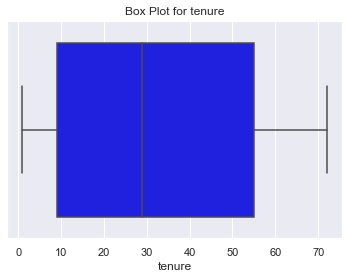

In [25]:
#Boxplot of tenure
sns.boxplot(x='tenure',data = telecom_df,color='blue')
plt.title('Box Plot for tenure')
plt.show()

In [26]:
#From above image we can see there are no outliers present but we need to confirm

print('\nThe number of Outliers present = ',len(check_Outlier1(telecom_df.tenure)))



IQR =  46.0
Upper Fence =  124.0 
Lower Fence =  -60.0

The number of Outliers present =  0


**For tenure column there are no outliers present.
From distribution graph we can see more data is concentrated in firtst quartile and last quartile.**

<br>**MonthlyCharges**

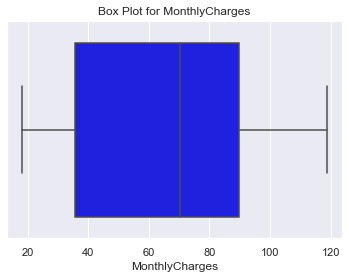

In [27]:
#Boxplot of MonthlyCharges
sns.boxplot(x='MonthlyCharges',data = telecom_df,color='blue')
plt.title('Box Plot for MonthlyCharges')
plt.show()

In [28]:
#From above image we can see there are no outliers present but we need to confirm

print('\nThe number of Outliers present = ',len(check_Outlier1(telecom_df.MonthlyCharges)))



IQR =  54.27499999999998
Upper Fence =  171.27499999999995 
Lower Fence =  -45.82499999999996

The number of Outliers present =  0


**MonthlyCharges doesn't have any outliers. The distribution graph shows there's more data in the first quartile than last.**

<br>**TotalCharges**

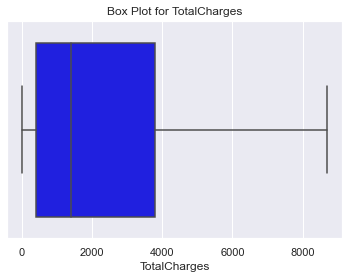

In [29]:
#Boxplot of TotalCharges
sns.boxplot(x='TotalCharges',data = telecom_df,color='blue')
plt.title('Box Plot for TotalCharges')
plt.show()

In [30]:
#From above image we can see there are no outliers present but we need to confirm

print('\nThe number of Outliers present = ',len(check_Outlier1(telecom_df.TotalCharges)))



IQR =  3393.2875000000004
Upper Fence =  8884.66875 
Lower Fence =  -4688.481250000001

The number of Outliers present =  0


**There are no outliers present. From the graph we can observe a small right skewness.**

<br><br><br>**Univariate Analysis of Categorical Data**

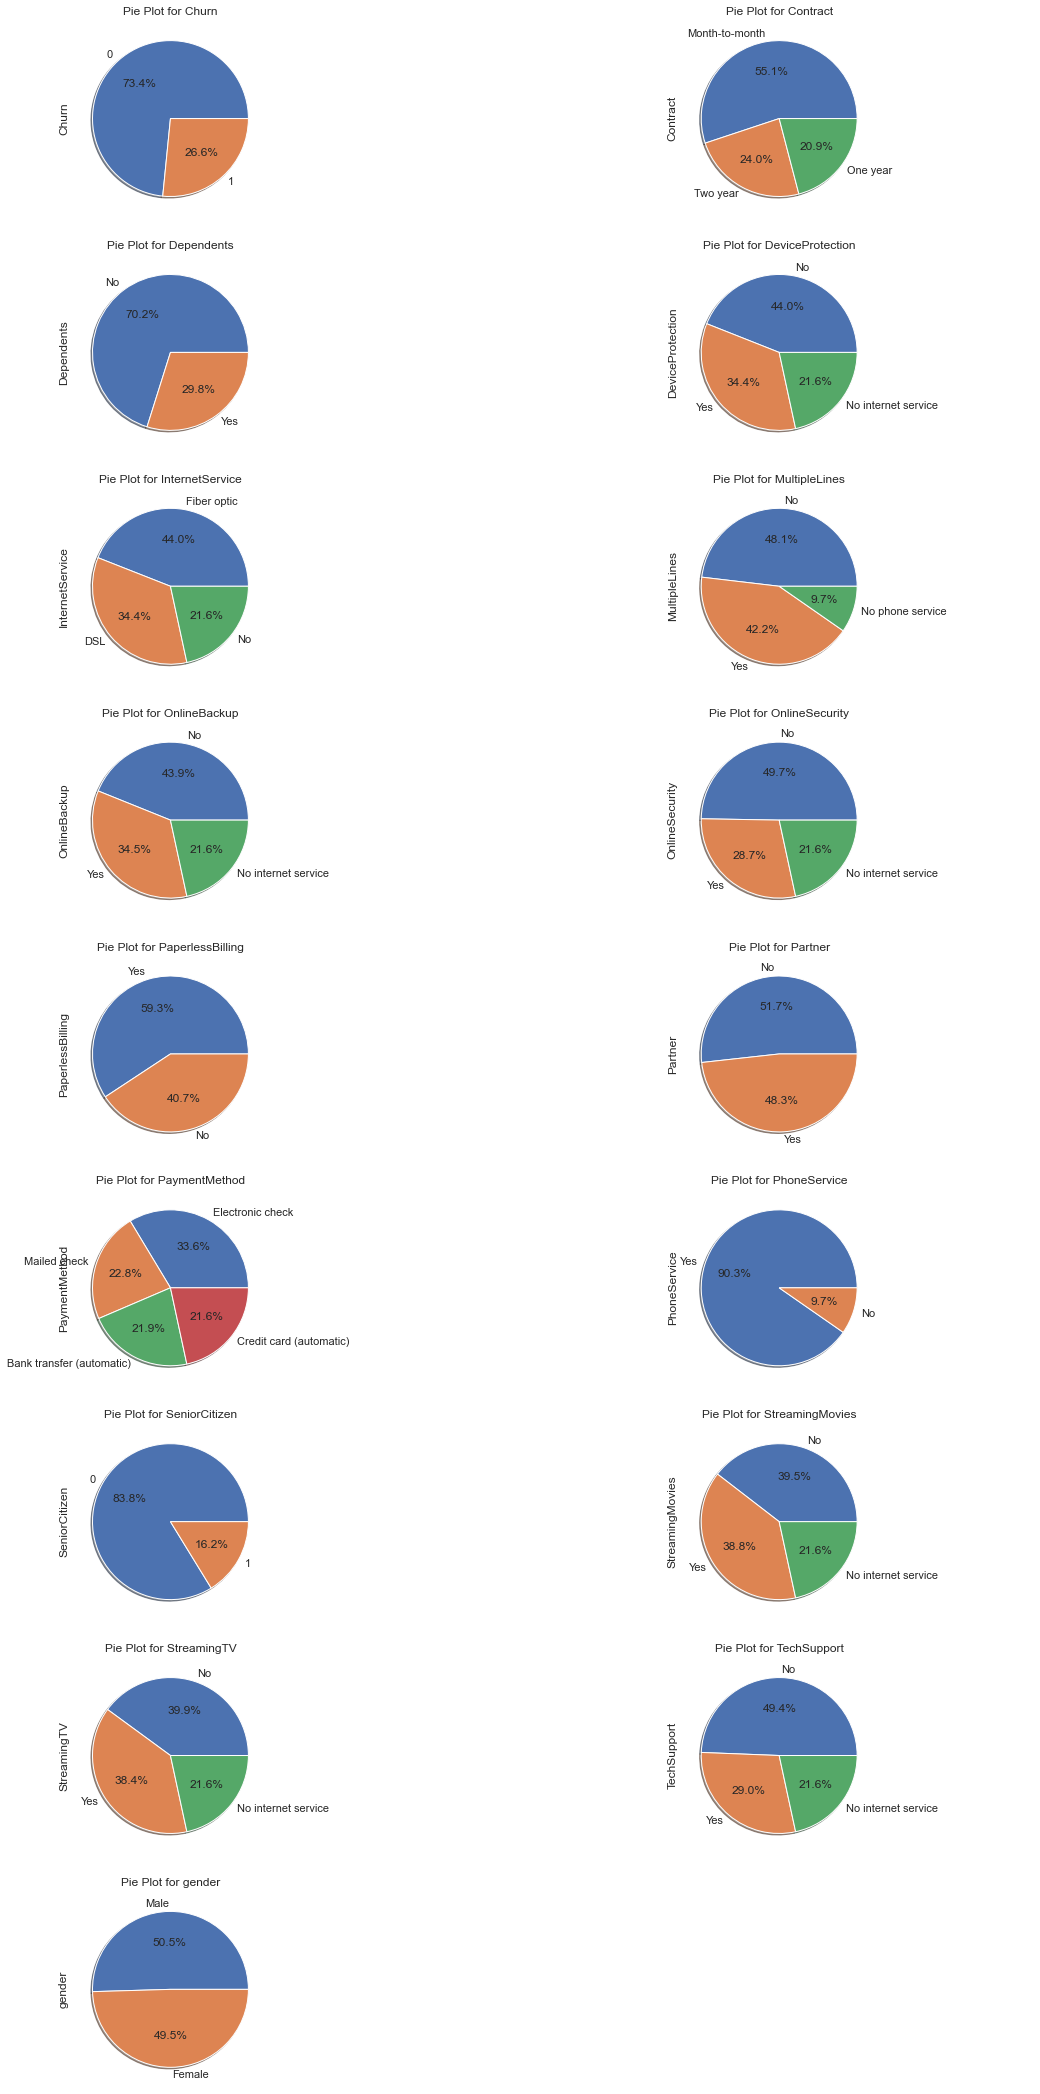

In [31]:
fig2,ax2 = plt.subplots(9,2)
fig2.set_figheight(38)
fig2.set_figwidth(20)
for i,col in  enumerate(telecom_df.columns.difference(numerical_cols)):
    telecom_df[col].value_counts().plot.pie(autopct='%1.1f%%',ax=ax2[i//2,i%2],shadow=True)
    
    ax2[i//2,i%2].set_title('Pie Plot for %s'%col)
    
ax2[8,1].axis('off')    
plt.show()

**Churn**<br>
In data almost 73% people tend not to churn from the telecom service.<br>
**Contract**<br>
Customer choose Month-to-Month plan rather than other plans. The number of customers opted for One year and Two year combined is equal to number of Month-Month choosers(55%).<br>
**Dependents**<br>
70% customers are Dependents.<br>
**DeviceProtection**<br>
In the data 21.6% customers have no Internet service, so we could not clearly depend upon whether DeviceProtection is valuable or not eventhough most customers do not opt for DeviceProtection.<br>
**InternetService**<br>
The total customers dont have internet service is also depicted here. 44% people opted for Fiber optic more than DSL.<br>
**MultipleLines**<br>
Out of 90% customers 42% have MultipleLines, which is closer to 48% of those who do not.<br>
**OnlineBackup**<br>
Majority customer do not have OnlineBackup.<br>
**OnlineSecurity**<br>
Almost half of total customers do not want OnlineSecurity.<br>
**PaperlessBilling**<br>
More people tend to opt for Paper less billing which is good.<br>
**Partner**<br>
Almost equal amount of customers opt for Parter account.<br>
**PaymentMethod**<br>
More people use Electronic check whereas there's only small difference between the number of customer using other payment method.<br>
**PhoneService**<br>
9.7% people do not have phone service.<br>
**SeniorCitizen**<br>
There is only 16.2% senior citizen in the customer set.<br>
**StreamingMovies**<br>
There's almost equal amount of people who opt and do not opt for Movie Streaming.<br>
**StreamingTv**<br>
The case is same as in Streaming Movies.<br>
**TechSupport**<br>
Half of the customers do not use Tech Support.<br>
**Gender**<br>
There's almost equal number of Male and Female customers.

<br><br>**Bi Variate Analysis**

Numerical vs Category


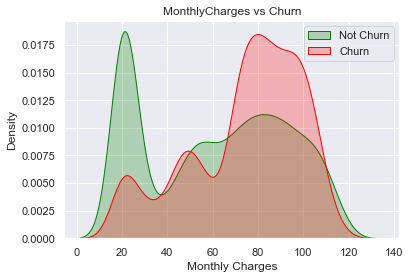

In [32]:
#Since churn or not churn is our target, we are only checking for any relation between churn attribute and other numerical attributes

ax3 = sns.kdeplot(telecom_df.MonthlyCharges[(telecom_df["Churn"] == 0) ],
                color="Green", shade = True);
ax4 = sns.kdeplot(telecom_df.MonthlyCharges[(telecom_df["Churn"] == 1) ],
                ax =ax3, color="Red", shade= True);
ax4.legend(["Not Churn","Churn"],loc='upper right');
ax4.set_ylabel('Density');
ax4.set_xlabel('Monthly Charges');
ax4.set_title('MonthlyCharges vs Churn');

Customers with high MonthlyCharges have higher chance to churn.

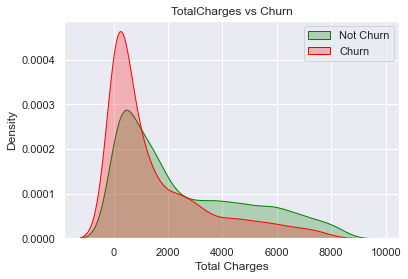

In [33]:
ax3 = sns.kdeplot(telecom_df.TotalCharges[(telecom_df["Churn"] == 0) ],
                color="Green", shade = True);
ax4 = sns.kdeplot(telecom_df.TotalCharges[(telecom_df["Churn"] == 1) ],
                ax =ax3, color="Red", shade= True);
ax4.legend(["Not Churn","Churn"],loc='upper right');
ax4.set_ylabel('Density');
ax4.set_xlabel('Total Charges');
ax4.set_title('TotalCharges vs Churn');

We can't completely say customers with lower TotalCharges have higher chance of churning.

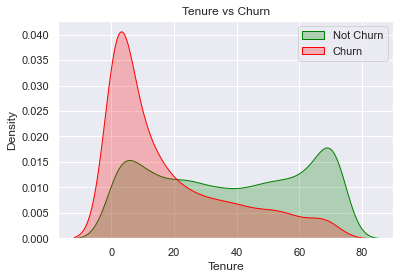

In [34]:
ax3 = sns.kdeplot(telecom_df.tenure[(telecom_df["Churn"] == 0) ],
                color="Green", shade = True);
ax4 = sns.kdeplot(telecom_df.tenure[(telecom_df["Churn"] == 1) ],
                ax =ax3, color="Red", shade= True);
ax4.legend(["Not Churn","Churn"],loc='upper right');
ax4.set_ylabel('Density');
ax4.set_xlabel('Tenure');
ax4.set_title('Tenure vs Churn');

Customers with lower tenure value, that is newer customers are more likely to churn.

<br>Category vs Category

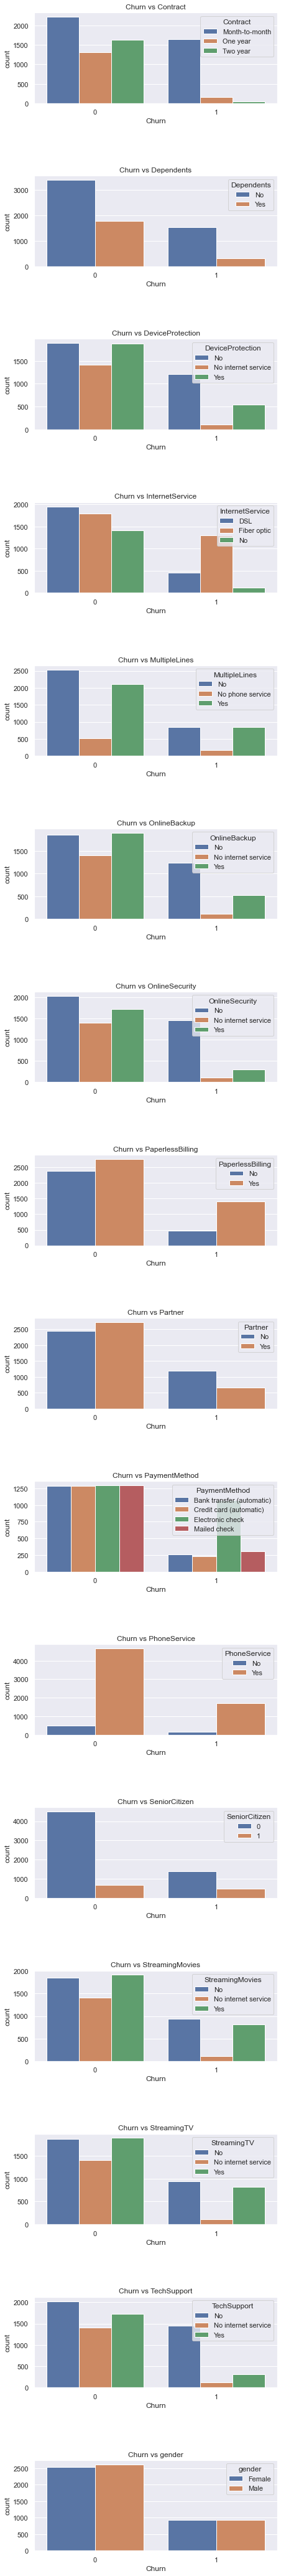

In [35]:
fig3,ax5 = plt.subplots(16,figsize=(7,75))

for i,col in  enumerate(telecom_df.columns.difference(numerical_cols)[1:]):
    sns.countplot(x='Churn',hue=col,data=telecom_df,ax=ax5[i])
    
    ax5[i].set_title('Churn vs %s'%col)
    


plt.subplots_adjust(hspace=0.8)
plt.show()

**Basic Conclusion from above**<br><br>
. There is small difference in number of customer  who changed the service provider. Both genders behaved in similar fashion when it comes to churning to another service provider.<br><br>
. About 75% of customer with Month-to-Month Contract opted to churn as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract.<br><br>
. More number of customers who churned were having Electronic Check as Payment Method.<br><br>
. Customers who opted for Credit-Card transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to churn.<br><br>
. Customers having DSL service are more in number and have less churn rate compared to Fibre optic service.<br><br>
. A large number of customers choose the Fiber optic service and it's also conclude that the customers who use Fiber optic have high churn rate, this might mean a dissatisfaction with this type of internet service.<br><br>
. Customers without dependents are more likely to churn.<br><br>
. Customers that doesn't have partners are more likely to churn.<br><br>
. It can be observed that the fraction of senior citizen is very less.<br><br>
. Most of the senior citizens churn.<br><br>
. Customers with no online security churn.<br><br>
. Customers with Paperless Billing are most likely to churn.<br><br>
. Customers having no TechSupport are most likely to churn to another service provider.<br><br>
. Very small fraction of customers don't have a phone service and out of that, 1/3rd Customers are more likely to churn.<br><br>

<br>We can check the correlation

In [36]:
corr1 = telecom_df.corr()
corr1
#Display the correaltion values between variables.

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


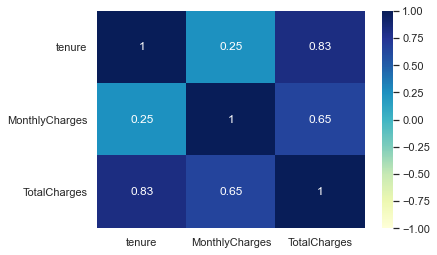

In [37]:
sns.heatmap(corr1,annot=True,cmap='YlGnBu',vmin=-1,vmax=1);
#Heat map of correlation

We can observe high relation between tenure and TotalCharges.<br>

<br>Multivariate Analysis

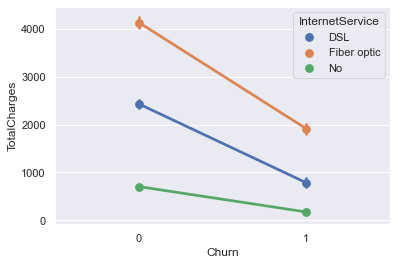

In [38]:
sns.pointplot(x='Churn',y='TotalCharges',hue='InternetService',data=telecom_df);


Customers with Fiber Optics have higher TotalCharges. Customers with medium TotalCharges tend to churn more.

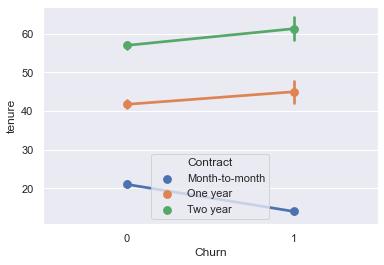

In [39]:
sns.pointplot(x='Churn',y='tenure',hue='Contract',data=telecom_df);


New customers choose Month-Month contract whereas old customers use Two year contract. New customers tend to churn more.

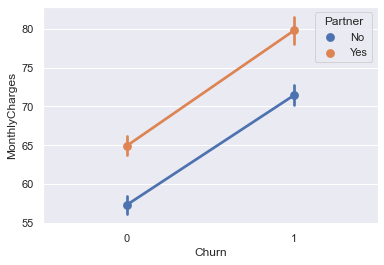

In [40]:
sns.pointplot(x='Churn',y='MonthlyCharges',hue='Partner',data=telecom_df);


Customers with partner have higher Monthlycharges. Customers with partners tend to churn more.

### <br>4.Data pre-processing:

Since ML algorithms understand numbers only, we need to convert our string to numerical values. For that we are using LabelEncoders.
We are using copy of our dataframe since it can't be used for further processing.

In [41]:
print(copy_telecom.dtypes)
copy_telecom["SeniorCitizen"]= copy_telecom["SeniorCitizen"].map({0: "No", 1: "Yes"})
#Converting SeniorCitizen column to object

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [42]:
copy_telecom.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [43]:
copy_telecom.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [44]:
def convert_to_int(ds):
    if ds.dtype=='object':
        ds = LabelEncoder().fit_transform(ds)
    return ds
#Function to create Label encoders and covert them to int.

In [45]:
copy_telecom = copy_telecom.apply(lambda x: convert_to_int(x))
copy_telecom.head()
#Calling our function

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


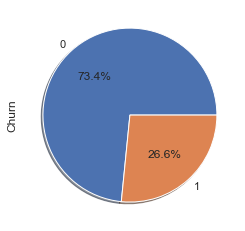

In [46]:
copy_telecom['Churn'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True);

There is large amount of imbalance. We have more(73.4%) data of customers that do not churn. This will lead to predicting towards the category which have more data. This can be removed using various methods

<br>Predictors vs Target Attributes

In [47]:
X = copy_telecom.drop(columns = ['Churn'])
y = copy_telecom['Churn'].values
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


<br>Test Train Split<br>

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

<br><br>Since the numerical features are distributed over different value ranges, we can use standard scalar to scale them down to the same range.

In [49]:
# Divide the columns into 3 categories, one for standardisation, one for label encoding and one for one hot encoding
standard = pd.DataFrame(StandardScaler().fit_transform(copy_telecom[numerical_cols].astype('float64')),
                       columns=numerical_cols)
onehot =['PaymentMethod', 'Contract', 'InternetService'] # those  need one-hot encoding
label = list(set(X_train.columns)- set(numerical_cols) - set(onehot)) #those  need label encoding


In [50]:
scaler= StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

### <br><br>5.Model training, testing and tuning:

Lets Train and Test use different models.

<br>Decison Tree Classifier

In [51]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train,y_train)
predictdt_y = dtc_model.predict(X_test)
test_accuracy_dtc = dtc_model.score(X_test,y_test)
print("Decision Tree Training accuracy is :",dtc_model.score(X_train,y_train))
print("Decision Tree Testing accuracy is :",test_accuracy_dtc)


Decision Tree Training accuracy is : 0.9987809833401057
Decision Tree Testing accuracy is : 0.7293838862559242


We can see Decision Tree gives very low score.There is a high degree of overfitting in the model due to which the test accuracy drops drastically. This shows why decision trees are prone to overfitting.
Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy.

In [52]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [53]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))
acc_DT = accuracy_score(y_test,preds_pruned)

0.7848341232227488
0.7809833401056481


After pruning we got a better train test accuracy.But the overal test accuracy has not increased.

In [54]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.784834


In [55]:
print(classification_report(y_test,preds_pruned))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1549
           1       0.64      0.44      0.52       561

    accuracy                           0.78      2110
   macro avg       0.73      0.67      0.69      2110
weighted avg       0.77      0.78      0.77      2110



The model is predicting category 0(not churn) with more precision while category 1(churn) is poorly predicted.
Category 0 have higher precision value 0.82 which means what fraction are predicted correctly out of all predicted same class.
Category 1 have lower recall value 0.64 which means out of all actual class how much fraction were identified correctly.

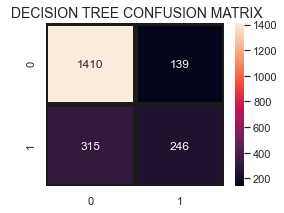

In [56]:
#Visualising using confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, preds_pruned),
                annot=True,fmt = "d",linecolor="k",linewidths=4)
    
plt.title(" DECISION TREE CONFUSION MATRIX",fontsize=14)
plt.show()

From above confusion matrix we can see that Non Loan holders are correctly predicted mostly, this might be due to imbalance.

<br>Random Forest

In [57]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
prediction_train = model_rf.predict(X_train)

print("Random Forest Training accuracy is :",metrics.accuracy_score(y_train, prediction_train))
print("Random Forest Testing accuracy is :",metrics.accuracy_score(y_test, prediction_test))
rf_accuracy = metrics.accuracy_score(y_test, prediction_test)

Random Forest Training accuracy is : 0.8157253149126371
Random Forest Testing accuracy is : 0.8137440758293839


Here the test accuracy (81.3%) is closer to the training accuracy,which is a good score.

In [58]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.71      0.51      0.59       561

    accuracy                           0.81      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



The precision value for category 1 (chrun) has increased as compared to previous model.

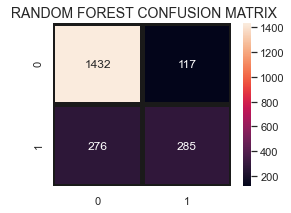

In [59]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=4)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

The correct prediction for churn and non churn has increased than the previous model.

In [60]:
#Store the accuracy results for each model in a dataframe for final comparison

rf_df = {'Method': 'Random Forest', 'accuracy': rf_accuracy}
resultsDf = resultsDf.append(rf_df, ignore_index = True)
resultsDf

,Method,accuracy
0,Decision Tree,0.784834
1,Random Forest,0.813744


<br>AdaBoost Classifier

In [61]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
a_preds_train = a_model.predict(X_train)
a_model_train_accuracy = metrics.accuracy_score(y_train, a_preds_train)

a_model_accuracy = metrics.accuracy_score(y_test, a_preds)
print("AdaBoost Classifier training accuracy = ",a_model_train_accuracy)
print("AdaBoost Classifier testing accuracy = ",a_model_accuracy)


AdaBoost Classifier training accuracy =  0.8049573344169036
AdaBoost Classifier testing accuracy =  0.8075829383886256


AdaBoost has training and testing accuracy so close. We could only finalise the best model after performing other models.

In [62]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



We can see the precison for churn has again reduced to 0.67 as compared to RandomForest model precion of 0.71

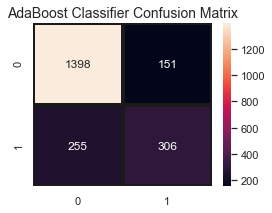

In [63]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

As same is reflected here in confusion matrix, more wrong predictions are made.

In [64]:
#Store the accuracy results for each model in a dataframe for final comparison

amodel_df = {'Method': 'AdaBoost', 'accuracy': a_model_accuracy}
resultsDf = resultsDf.append(amodel_df, ignore_index = True)
resultsDf

,Method,accuracy
0,Decision Tree,0.784834
1,Random Forest,0.813744
2,AdaBoost,0.807583


<br><br>Gradient Boosting Classifier

In [65]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred_test = gb.predict(X_test)
gb_pred_train = gb.predict(X_train)
gb_train_accuracy = accuracy_score(y_train, gb_pred_train)
gb_test_accuracy = accuracy_score(y_test, gb_pred_test)

print("Gradient Boosting Classifier training accuracy : ", gb_train_accuracy)
print("Gradient Boosting Classifier testing accuracy : ", gb_test_accuracy)

Gradient Boosting Classifier training accuracy :  0.8250711093051605
Gradient Boosting Classifier testing accuracy :  0.8075829383886256


The testing accuracy is slightly lower than training accuracy. We already have better accuracy giving models.

In [66]:
print(classification_report(y_test, gb_pred_test))


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



We can see similar classification report of AdaBoost. But accuracy is different.

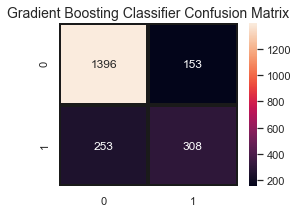

In [67]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

There is only a slight inrease as compared to AdaBoost model.

In [68]:
#Store the accuracy results for each model in a dataframe for final comparison

gb_df = {'Method': 'Gradient Boost', 'accuracy': gb_test_accuracy}
resultsDf = resultsDf.append(gb_df, ignore_index = True)
resultsDf

,Method,accuracy
0,Decision Tree,0.784834
1,Random Forest,0.813744
2,AdaBoost,0.807583
3,Gradient Boost,0.807583


<br><br>Bagging

In [69]:
bgcl = BaggingClassifier()
bgcl = bgcl.fit(X_train,y_train)
bgcl_train = bgcl.predict(X_train)
bgcl_test = bgcl.predict(X_test)
bgcl_acc_train = metrics.accuracy_score(y_train, bgcl_train)
bgcl_acc_test = metrics.accuracy_score(y_test, bgcl_test)


print("Bagging Classifier training accuracy : ", bgcl_acc_train)
print("Bagging  Classifier testing accuracy : ", bgcl_acc_test)

Bagging Classifier training accuracy :  0.9819179195449005
Bagging  Classifier testing accuracy :  0.7800947867298578


There is a big difference between the training and testing accuracies. Which is not good.

In [70]:
print(classification_report(y_test, bgcl_test))


              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.61      0.48      0.54       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



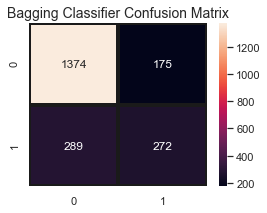

In [71]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, bgcl_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Bagging Classifier Confusion Matrix",fontsize=14)
plt.show()

From classification report and confusion matrix we can see Bagging is performing poorly as compared to other models.

In [72]:
#Store the accuracy results for each model in a dataframe for final comparison

gb_df = {'Method': 'Bagging', 'accuracy': bgcl_acc_test}
resultsDf = resultsDf.append(gb_df, ignore_index = True)
resultsDf

,Method,accuracy
0,Decision Tree,0.784834
1,Random Forest,0.813744
2,AdaBoost,0.807583
3,Gradient Boost,0.807583
4,Bagging,0.780095


<br>Best model

In [73]:
#We have stored accuracy of all the models we have used, now lets compare which is the best model.
resultsDf[resultsDf.accuracy==resultsDf.accuracy.max()]

,Method,accuracy
1,Random Forest,0.813744


From above we can see RandomForest have higher accuracy, so we could choose it as the best model.

### <br>6.Conclusion and improvisation.

**From classification report and accuracy we can say Random Forest performs well in both training and testing data. The mode of connection the customer using etc gave a detailed conclusion about the churn probability. Data about the region of each customer could have added to the dataframe. We could have received more view into the problem, for example if churn chance is higher for a certain region we could say it is due to the connectivity facility provided by the Telecom firm. Maybe the common subscription plan could have been added since we can check whether the churn is due to bad plans provided by industry. The average speed provided could be added for finding the relation for churn. Customer churn is definitely bad to a firm ’s profitability. Various strategies can be implemented to eliminate customer churn. The best way to avoid customer churn is for a company to truly know its customers.**
    
